In [1]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
Consumer_Key = "wPqzRAD6SEdriV4dfLGmqehX5"
Consumer_Secret_Key = "Nz0lxeKJMiSLje2oMW02xlh4oFane1luGej3ntoQNZ1dEO2m3P" 
Access_Token = "1588141653402955777-QitXYq05orKkIo5STao4Ee741EaQeO"
Access_Token_Secret = "PmvFp3gInb5KF7tLBeqDIg2kLSUr1LiXuvKCf5eR8W8UG"

In [3]:
auth = tweepy.OAuthHandler(Consumer_Key,Consumer_Secret_Key)
auth.set_access_token(Access_Token,Access_Token_Secret)
api = tweepy.API(auth)

In [4]:
posts = api.user_timeline(screen_name="XLAxiata_Tbk", count = 1000, lang = "id", tweet_mode = "extended")

# Print the last 5 tweets
print("Show the 5 recent:\n")
i=1
for tweet in posts[:5]:
  print(str(i)+') '+tweet.full_text +'\n')
  i = i+1

Show the 5 recent:

1) Buat yang masih bingung mau ngapain di akhir tahun, mungkin bisa ikutin salah satu rekomendasi ini.

Tapi apapun rencana kamu, jangan lupa upgrade ke @XL_Prioritas buat dapetin kuota unlimited dan internet lancar! Semoga tahun depan #JadiLebihBaik lagi yaa💙 https://t.co/0s5ZSN65Tk

2) XL Axiata Ada Untuk Indonesia dan selalu #JadiLebihBaik

3) Seluruh rangkaian acara Presidensi G20 Indonesia 2022, telah terlaksana dengan sukses.

Sherpa Track dan Finance Track Presidensi G20 Indonesia 2022 memberikan apresiasi kepada pihak-pihak yang telah berkontribusi, salah satunya ialah XL Axiata. https://t.co/W708lnofW2

4) Libur panjang Natal dan Tahun Baru, XL Axiata telah menyiapkan jaringan 4G untuk mengantisipasi lonjakan trafik di Banten.

Penguatan jaringan data ini merupakan upaya XL Axiata untuk selalu #JadiLebihBaik dan memastikan layanan yang maksimal kepada pelanggan. https://t.co/Xq1vBgJjK1

5) Aku, ketika bestieku udah libur cuti akhir tahun.

Kalo kamu cuti ak

In [5]:
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])
df.head()

,Tweets
0,Buat yang masih bingung mau ngapain di akhir t...
1,XL Axiata Ada Untuk Indonesia dan selalu #Jadi...
2,Seluruh rangkaian acara Presidensi G20 Indones...
3,"Libur panjang Natal dan Tahun Baru, XL Axiata ..."
4,"Aku, ketika bestieku udah libur cuti akhir tah..."


In [6]:
def cleanTxt(text):
  text = re.sub('@[A-Za-z0-9]+', '', text)
  text = re.sub('#', '', text)
  text = re.sub('RT[\s]+', '', text)
  text = re.sub('https?:\/\/\S+', '', text)

  return text

df['Tweets'] = df['Tweets'].apply(cleanTxt)

df

,Tweets
0,Buat yang masih bingung mau ngapain di akhir t...
1,XL Axiata Ada Untuk Indonesia dan selalu JadiL...
2,Seluruh rangkaian acara Presidensi G20 Indones...
3,"Libur panjang Natal dan Tahun Baru, XL Axiata ..."
4,"Aku, ketika bestieku udah libur cuti akhir tah..."
...,...
195,"Hi, terima kasih atas partisipasinya. Jangan ..."
196,"Untuk memiliki pola pikir yang berkembang, kam..."
197,"Hi Kak, Mohon maaf atas ketidaknyamanan kamu ..."
198,"Untuk pengecekan lebih detail, DM langsung la..."


In [7]:
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  return TextBlob(text).sentiment.polarity

df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

df

,Tweets,Subjectivity,Polarity
0,Buat yang masih bingung mau ngapain di akhir t...,0.0,0.0
1,XL Axiata Ada Untuk Indonesia dan selalu JadiL...,0.0,0.0
2,Seluruh rangkaian acara Presidensi G20 Indones...,0.0,0.0
3,"Libur panjang Natal dan Tahun Baru, XL Axiata ...",0.0,0.0
4,"Aku, ketika bestieku udah libur cuti akhir tah...",0.0,0.0
...,...,...,...
195,"Hi, terima kasih atas partisipasinya. Jangan ...",0.0,0.0
196,"Untuk memiliki pola pikir yang berkembang, kam...",0.0,0.0
197,"Hi Kak, Mohon maaf atas ketidaknyamanan kamu ...",1.0,0.5
198,"Untuk pengecekan lebih detail, DM langsung la...",1.0,0.5


<function matplotlib.pyplot.show(*args, **kw)>

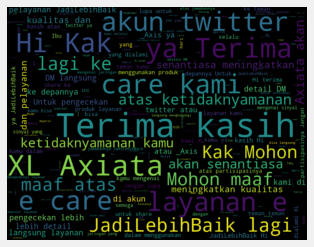

In [8]:
allwords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=900, height=700, random_state=10, max_font_size=100).generate(allwords)

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show

In [9]:
def getAnalysis(score):

  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'
df['Analysis'] = df['Polarity'].apply(getAnalysis)
df

,Tweets,Subjectivity,Polarity,Analysis
0,Buat yang masih bingung mau ngapain di akhir t...,0.0,0.0,Neutral
1,XL Axiata Ada Untuk Indonesia dan selalu JadiL...,0.0,0.0,Neutral
2,Seluruh rangkaian acara Presidensi G20 Indones...,0.0,0.0,Neutral
3,"Libur panjang Natal dan Tahun Baru, XL Axiata ...",0.0,0.0,Neutral
4,"Aku, ketika bestieku udah libur cuti akhir tah...",0.0,0.0,Neutral
...,...,...,...,...
195,"Hi, terima kasih atas partisipasinya. Jangan ...",0.0,0.0,Neutral
196,"Untuk memiliki pola pikir yang berkembang, kam...",0.0,0.0,Neutral
197,"Hi Kak, Mohon maaf atas ketidaknyamanan kamu ...",1.0,0.5,Positive
198,"Untuk pengecekan lebih detail, DM langsung la...",1.0,0.5,Positive


In [12]:
print('Printing negative tweets:\n')
j=i
sortedDF = df.sort_values(by=['Polarity'],ascending=False)
for i in range(0,sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Negative'):
    print(str(j) + ') '+sortedDF['Tweets'][i])
    print()
    j=j+1

Printing negative tweets:



In [11]:
print('Printing positive tweets:\n')
j=i
sortedDF = df.sort_values(by=['Polarity'],ascending=True)
for i in range(0,sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Positive'):
    print(str(j) + ') '+sortedDF['Tweets'][i])
    print()
    j=j+1

Printing positive tweets:

199)  Hi Kak Untuk informasi seputar layanan/produk XL, kamu bisa langsung menghubungi layanan e-care kami melalui DM ke akun twitter  atau _Axis ya :) Terima kasih

200)  Hi Kak Untuk informasi seputar layanan/produk XL, kamu bisa langsung menghubungi layanan e-care kami melalui DM ke akun twitter  atau _Axis ya :) Terima kasih

201)  Hi Kak, Mohon maaf atas ketidaknyamanan kamu mengenai sinyal yang dialami. XL Axiata akan senantiasa meningkatkan kualitas dan pelayanan JadiLebihBaik lagi ke depannya. Untuk pengecekan lebih detail, DM langsung layanan e-care kami di akun twitter  ya :) Terima kasih

202) _h2m Untuk pengecekan lebih detail, DM langsung layanan e-care kami di akun twitter  atau _Axis ya :) Terima kasih

203)  Untuk pengecekan lebih detail, DM langsung layanan e-care kami di akun twitter  atau _Axis ya :) Terima kasih

204)  Untuk pengecekan lebih detail, DM langsung layanan e-care kami di akun twitter  atau _Axis ya :) Terima kasih

205)  Hi Ka

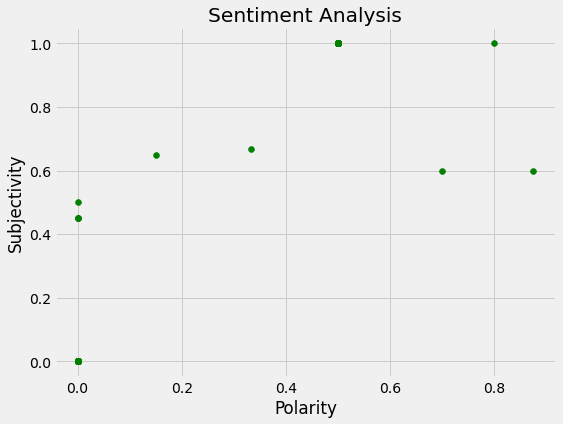

In [13]:
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
  plt.scatter(df["Polarity"][i], df["Subjectivity"][i], color='Green')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [14]:
df['Analysis'].value_counts()

Neutral     140
Positive     60
Name: Analysis, dtype: int64

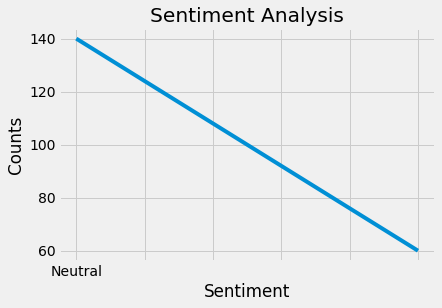

In [15]:
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='line')
plt.show()

In [16]:
df['Analysis'].value_counts()

Neutral     140
Positive     60
Name: Analysis, dtype: int64

In [17]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Tweets        200 non-null    object 
 1   Subjectivity  200 non-null    float64
 2   Polarity      200 non-null    float64
 3   Analysis      200 non-null    object 
dtypes: float64(2), object(2)
memory usage: 6.4+ KB


,Subjectivity,Polarity
count,200.000000,200.000000
mean,0.301833,0.151792
std,0.449588,0.236931
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,0.500000
max,1.000000,0.875000


In [18]:
df.duplicated().sum()

79

In [19]:
df.isnull().sum()

Tweets          0
Subjectivity    0
Polarity        0
Analysis        0
dtype: int64

In [20]:
df.dtypes

Tweets           object
Subjectivity    float64
Polarity        float64
Analysis         object
dtype: object

In [21]:
df.corr()

,Subjectivity,Polarity
Subjectivity,1.000000,0.962441
Polarity,0.962441,1.000000


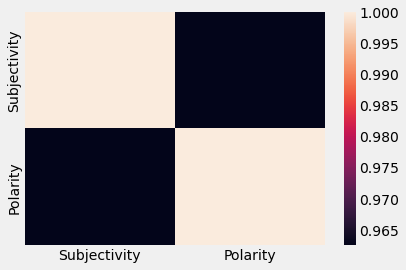

In [22]:
sns.heatmap(df.corr())